# Example2: Basic RevelsMD Functionality 3D

We'll now look at the calcualtion of a simple number density for a single satic lennard jones sphere, solvated by additional lennard jones spheres.

In [4]:
from revelsmd.trajectory_states import LammpsTrajectoryState
from revelsmd.revels_3D import Revels3D
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as md
%matplotlib inline

In [15]:
pwd

'/Users/swc57/revelsmd'

Again we generate a trajectory state. In this case we set the charge_and_mass keyword to false as in this lennard jones sphere example we have not assigned charges to particles this is normally not nececessary.

In [16]:
traj=LammpsTrajectoryState('/Users/swc57/revels-md/examples/example_2_LJ_3D/dump.nh.lammps','/Users/swc57/revels-md/examples/example_2_LJ_3D/data.fin.nh.data',units='lj',atom_style="id resid type q x y z ix iy iz",charge_and_mass=False)

## Calculating a force based 3D density

The three dimensional density part of the code is more involved than the RDF and requires the generation of two additional python objects. A GridState (in which the calculation is performed), and a SelectionState (which containd indexing information for the species we are indexing). Here we have the simplest example possible, and start by generating the grid state

In [18]:
GS=Revels3D.GridState(traj,'number',nbins=200,temperature=1.35)

We then move to gridding of the force densities (we calculate the traditional number density at the same time), when we do this we need to choose if we use a triangular kernel or a box kernel as described in the 3d density paper. Here we use the lower variance traingular kernel, which is essentially the reverse of trilinear interpolation. The box kernel has a higher varience and is closer to traditional methods, it may be more appropriate in certain circumstances.

In [19]:
GS.make_force_grid(traj,'2',kernel='triangular',rigid=False)

NameError: name 'RevelsMD3D' is not defined

We then perform the integral of the force density to obtain our reduced variance number density.

In [5]:
GS.get_real_density()

We can then plot the 3 dimensional densities, and observe the excluded volume around the frozen. Particle, in this example we have calculated this using relatively few frames. The best way to crisp the void is to take a linear combination of the conventional and force density with a reduced varience.

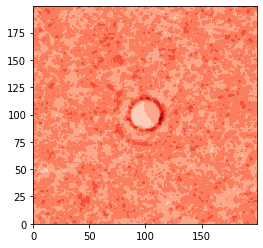

In [6]:
plt.figure(figsize=(4,4))
plt.contourf(np.fft.fftshift(GS.rho[:,:,0]),cmap='Reds')


We now move to take linear combination of the conventional 3 density, and the force method comparative to the method we use in https://doi.org/10.1063/5.0053737 . 

In [ ]:
NGS= GS.get_lambda(traj,2499)

 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 1554/2499 [2:25:05<43:57,  2.79s/it]